Enlace al drive para ver los resultados de kaggle: https://drive.google.com/drive/folders/1oAbK4EQ8AgXaUlwiFK-8V5vNuTURsuTS?usp=drive_link

# Cargo mi set encodeado

In [ ]:
import pandas as pd

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
train_set = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/TP2/RandomForest (Modelo2)/set_train_modelos_encoded.parq')

In [ ]:
X_train, y_train = train_set.iloc[:,:-1],train_set.iloc[:,-1]

In [ ]:
del train_set

In [ ]:
test_set = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/TP2/RandomForest (Modelo2)/set_validation_modelos_encoded.parq')

In [ ]:
X_test, y_test = test_set.iloc[:,:-1],test_set.iloc[:,-1]

In [ ]:
del test_set

#Busqueda hiperparametros

In [ ]:
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(1, 20),
    'min_samples_split': uniform(0.01, 0.99),
    'min_samples_leaf': randint(1, 50),
    'bootstrap': [True, False],
    'max_features': ['sqrt']
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

random_search = RandomizedSearchCV( rf_model, param_distributions=param_dist, n_iter=5, scoring='f1', cv=3, random_state=50, verbose=2)

random_search.fit(X_train, y_train)

#Muestra los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", random_search.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=12, min_samples_split=0.08363284128099063, n_estimators=142; total time= 2.7min
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=12, min_samples_split=0.08363284128099063, n_estimators=142; total time= 2.6min
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=12, min_samples_split=0.08363284128099063, n_estimators=142; total time= 2.6min
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=0.9966084878531029, n_estimators=143; total time= 1.1min
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=0.9966084878531029, n_estimators=143; total time= 1.2min
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=0.9966084878531029, n_estimators=143; total time= 1.1min
[CV] END bootstrap=Tru

In [ ]:
del random_search

# Entrenamiento (Random Forest)

In [ ]:
hiperparametros =  {'bootstrap': True, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 21, 'min_samples_split': 0.09772638596658893, 'n_estimators': 59}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(**hiperparametros, verbose=2)
model_rf.fit(X_train, y_train)

building tree 1 of 59
building tree 2 of 59
building tree 3 of 59
building tree 4 of 59
building tree 5 of 59
building tree 6 of 59
building tree 7 of 59
building tree 8 of 59
building tree 9 of 59
building tree 10 of 59
building tree 11 of 59
building tree 12 of 59
building tree 13 of 59
building tree 14 of 59
building tree 15 of 59
building tree 16 of 59
building tree 17 of 59
building tree 18 of 59
building tree 19 of 59
building tree 20 of 59
building tree 21 of 59
building tree 22 of 59
building tree 23 of 59
building tree 24 of 59
building tree 25 of 59
building tree 26 of 59
building tree 27 of 59
building tree 28 of 59
building tree 29 of 59
building tree 30 of 59
building tree 31 of 59
building tree 32 of 59
building tree 33 of 59
building tree 34 of 59
building tree 35 of 59
building tree 36 of 59
building tree 37 of 59
building tree 38 of 59
building tree 39 of 59
building tree 40 of 59


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  3.2min


building tree 41 of 59
building tree 42 of 59
building tree 43 of 59
building tree 44 of 59
building tree 45 of 59
building tree 46 of 59
building tree 47 of 59
building tree 48 of 59
building tree 49 of 59
building tree 50 of 59
building tree 51 of 59
building tree 52 of 59
building tree 53 of 59
building tree 54 of 59
building tree 55 of 59
building tree 56 of 59
building tree 57 of 59
building tree 58 of 59
building tree 59 of 59


RandomForestClassifier(max_depth=7, min_samples_leaf=21,
                       min_samples_split=0.09772638596658893, n_estimators=59,
                       verbose=2)

In [ ]:
y_pred = model_rf.predict(X_test)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   12.1s


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99   4107542
           1       0.76      0.62      0.68    115996

    accuracy                           0.98   4223538
   macro avg       0.88      0.81      0.84   4223538
weighted avg       0.98      0.98      0.98   4223538



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, model_rf.predict(X_train)))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    9.0s


              precision    recall  f1-score   support

           0       0.94      0.99      0.96   2990274
           1       0.88      0.61      0.72    498379

    accuracy                           0.93   3488653
   macro avg       0.91      0.80      0.84   3488653
weighted avg       0.93      0.93      0.93   3488653



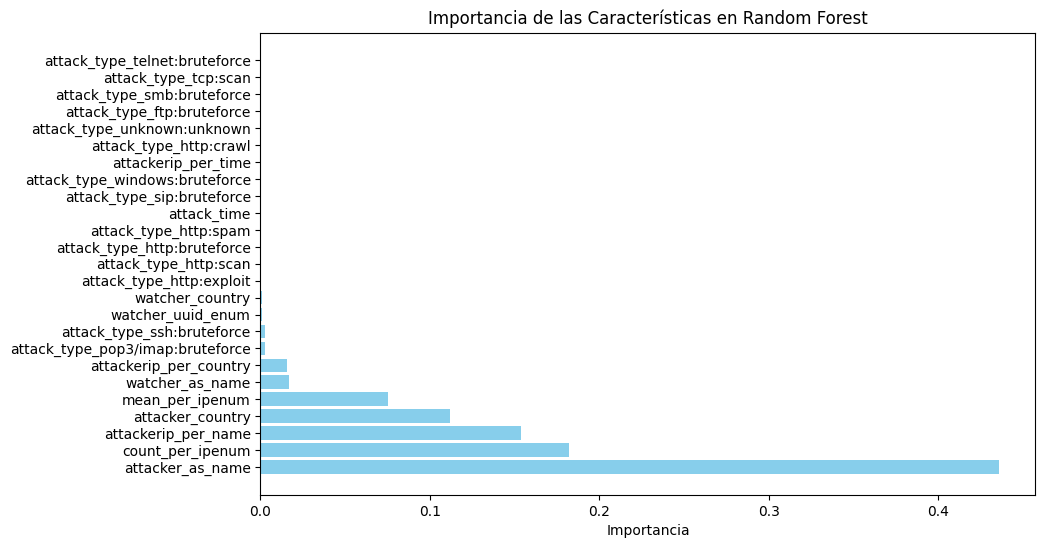

In [ ]:
import matplotlib.pyplot as plt

importancias = model_rf.feature_importances_
nombres_caracteristicas = X_train.columns
importancias_df = pd.DataFrame({'Característica': nombres_caracteristicas, 'Importancia': importancias})
importancias_df = importancias_df.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importancias_df['Característica'], importancias_df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las Características en Random Forest')
plt.show()

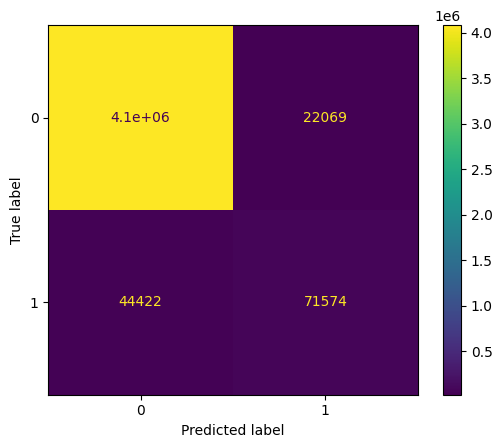

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
disp.plot()

Resultados Kaggle:

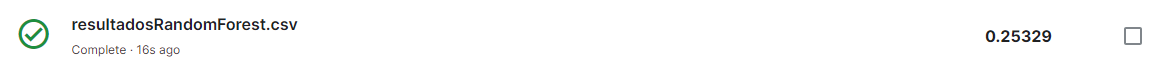

#Validacion contra KAGGLE



In [ ]:
del X_train
del y_train
del X_test
del y_test

In [ ]:
kaggle_set = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/TP2/RandomForest (Modelo2)/test_kaggle_modelos_encoded.parq')

In [ ]:
y_test_kaggle = kaggle_set['attacker_ip_enum']
X_test_kaggle = kaggle_set.drop(columns='attacker_ip_enum')

In [ ]:
del kaggle_set

Predicciones

In [ ]:
y_pred_kaggle = model_rf.predict(X_test_kaggle)
y_pred_kaggle = pd.Series(y_pred_kaggle, name='label')

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   50.7s


In [ ]:
RESULTADOS_KAGGLE = pd.concat([y_test_kaggle, y_pred_kaggle], axis=1)

In [ ]:
#Debe tener 49420 filas
RESULTADOS_KAGGLE = RESULTADOS_KAGGLE.drop_duplicates(subset='attacker_ip_enum').reset_index(drop=True)
RESULTADOS_KAGGLE

,attacker_ip_enum,label
0,7696,0
1,7543,0
2,7280,1
3,1538,0
4,285,0
...,...,...
49415,196304,0
49416,199918,0
49417,192446,0
49418,192056,0


In [ ]:
RESULTADOS_KAGGLE['label'].value_counts()

0    46858
1     2562
Name: label, dtype: int64

In [ ]:
RESULTADOS_KAGGLE.to_csv('/content/drive/MyDrive/Colab Notebooks/TP2/RandomForest (Modelo2)/resultadosRandomForest.csv', index=False)